In [1]:
from scipy.io import savemat, loadmat

In [2]:
from gene_mat import gen_dataset
from dcj_comp import dcj_dist

In [3]:
data = loadmat('data/data_50.mat')

In [4]:
data.keys()

dict_keys(['__header__', '__version__', '__globals__', 's', 'o', 't', 'd'])

In [5]:
seqs = data['s']
t_dist = data['t']
d_dist = data['d']

In [6]:
seqs.shape

(1000, 20, 50)

In [7]:
t_dist.shape

(1000, 20)

In [8]:
d_dist.shape

(1000, 20)

In [9]:
import time
import numpy as np

In [10]:
l,n,repeat = 100, 200, 40

In [11]:
print(time.ctime())
s, o, t = gen_dataset(l, n, repeat)
d = np.array([[dcj_dist(a[0], x)[-1] for x in a] for a in s])
print(time.ctime())

Wed Nov 10 12:11:35 2021
Wed Nov 10 12:11:47 2021


In [12]:
t_sum = np.zeros(t.shape)
for i in range(1, t.shape[-1]):
    t_sum[:, i] = t_sum[:, i-1] + t[:, i]

In [13]:
seqs.shape

(1000, 20, 50)

In [14]:
seq = seqs[0]

In [15]:
import torch as th

In [16]:
from torch_geometric.data import Data

In [17]:
from genome_graph import gen_single_graph

In [18]:
t_dist[0]

array([0., 2., 1., 2., 2., 1., 2., 1., 2., 2., 2., 2., 1., 2., 2., 2., 2.,
       2., 2., 1.])

In [19]:
g36 = gen_single_graph(seq[(3,6), :])

In [20]:
g36

Data(x=[100, 2], edge_index=[2, 198], dtype=torch.int64, num_nodes=100)

In [21]:
seq[3,:]

array([ 50., -49.,  10., -16.,   5.,  -1., -27., -13.,   6.,  -9.,   4.,
        22., -17., -35.,  18.,  46., -48.,  23., -36.,   7.,   3.,  12.,
       -45., -25., -31., -19., -34., -44., -32., -40.,  29.,  47., -15.,
       -37.,  20.,  28.,  21., -33.,  11., -30.,  38.,  39.,  26., -42.,
       -14.,  -2.,  43., -41.,  -8., -24.])

In [22]:
s, o, t = gen_dataset(10, 100, 5)

In [23]:
seqs = s[20]

In [24]:
seqs

array([[-7., -4., -6., -2.,  1., 10.,  5.,  8.,  9., -3.],
       [-7., -2.,  1.,  6.,  4., 10.,  5.,  8.,  9., -3.],
       [-7., -2., -1.,  6.,  4., 10.,  5.,  8.,  9., -3.],
       [ 5.,  8.,  9., -3.,  6.,  4., 10., -7., -2., -1.],
       [ 5.,  2.,  8.,  9., -3.,  6.,  4., 10., -7., -1.]])

In [25]:
g14 = gen_single_graph(seqs[(1,4), :])

In [26]:
g14

Data(x=[20, 2], edge_index=[2, 38], dtype=torch.int64, num_nodes=20)

In [27]:
seqs[(1,4), :]

array([[-7., -2.,  1.,  6.,  4., 10.,  5.,  8.,  9., -3.],
       [ 5.,  2.,  8.,  9., -3.,  6.,  4., 10., -7., -1.]])

In [28]:
g14.edge_index

tensor([[13, 12,  3,  2,  0,  1, 10, 11,  6,  7, 18, 19,  8,  9, 14, 15, 16, 17,
          5,  8,  9,  2,  3, 14, 15, 16, 17,  5,  4, 10, 11,  6,  7, 18, 19, 13,
         12,  1],
        [12,  3,  2,  0,  1, 10, 11,  6,  7, 18, 19,  8,  9, 14, 15, 16, 17,  5,
          4,  9,  2,  3, 14, 15, 16, 17,  5,  4, 10, 11,  6,  7, 18, 19, 13, 12,
          1,  0]], dtype=torch.int32)

In [29]:
from genome_graph import plot_multi_graph

In [30]:
seqs[(1,4), :]

array([[-7., -2.,  1.,  6.,  4., 10.,  5.,  8.,  9., -3.],
       [ 5.,  2.,  8.,  9., -3.,  6.,  4., 10., -7., -1.]])

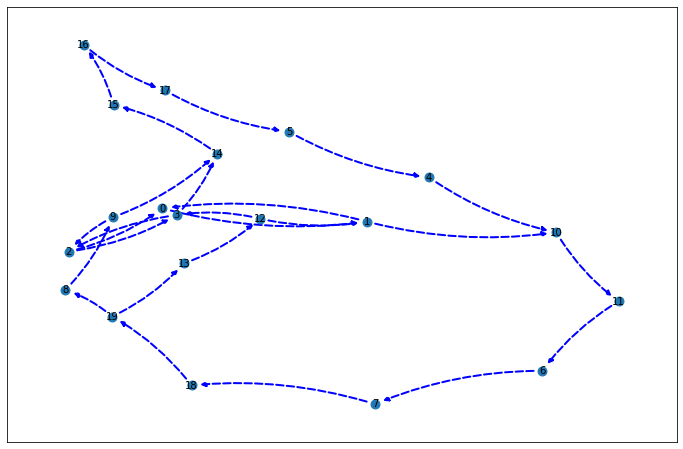

In [60]:
import networkx as nx
from torch_geometric.utils.convert import to_networkx
# graphs = [gen_single_graph([[1,2,3,4,5,6,7,8,9,10]])]
# graphs = [gen_single_graph([x]) for x in seqs[(1,4), :]]
graphs = gen_single_graph(seqs[(1,4), :])
plot_multi_graph([graphs], figsize = (12,8))

In [32]:
x = [[1], [2], [3]]
edge = [[1,2,3], [2,3,4]]

In [33]:
test = Data(x = x, edge_index = th.tensor(edge), num_nodes = 4, dtype = th.int, label = ['a', 'b', 'c'])

In [34]:
test

Data(x=[3], edge_index=[2, 3], num_nodes=4, dtype=torch.int32, label=[3])

In [35]:
test.label

['a', 'b', 'c']

In [36]:
g = to_networkx(test)

In [37]:
g

In [51]:
test = gen_single_graph([[1,2,3]])
test1 = gen_single_graph([[1,-2,3]])
test2 = gen_single_graph([[-3,-2,-1]])

In [56]:
mul_test = gen_single_graph([[1,-2,3], [-3,-2,-1]])

In [61]:
mul_test.x.shape

(6, 2)

In [62]:
mul_test.edge_index.shape

torch.Size([2, 10])

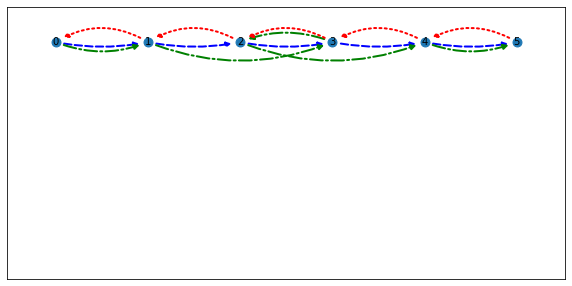

In [53]:
plot_multi_graph([test, test1, test2], figsize = (10,5), pos = {a: [a, 0] for a in range(6)})

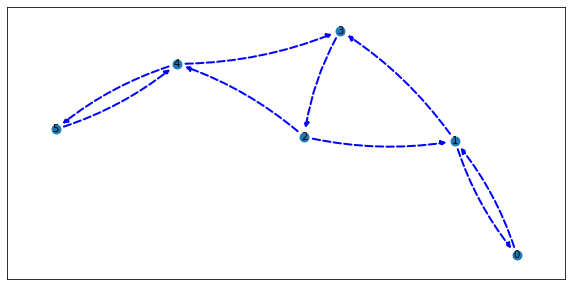

In [57]:
plot_multi_graph([mul_test], figsize = (10,5))

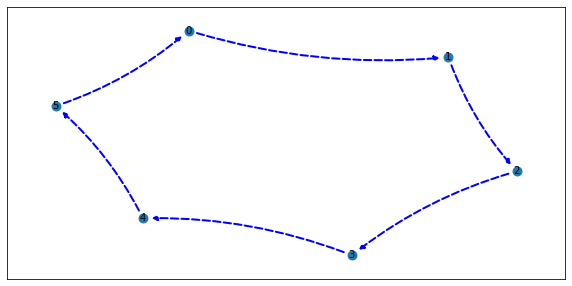

In [63]:
plot_multi_graph([gen_single_graph([[1,2,3,1]])], figsize = (10,5))

In [43]:
nx.planar_layout(to_networkx(test))

{0: array([-1.        , -0.41666667]),
 1: array([ 1.        , -0.41666667]),
 2: array([0.5       , 0.08333333]),
 3: array([0.25      , 0.33333333]),
 4: array([0.        , 0.58333333]),
 5: array([-0.75      , -0.16666667])}

In [44]:
{a: [a, 0] for a in range(6)}

{0: [0, 0], 1: [1, 0], 2: [2, 0], 3: [3, 0], 4: [4, 0], 5: [5, 0]}

In [45]:
t = 1 if False else 0

In [46]:
t

0

In [1]:
from genome_graph import gen_graph, gen_single_graph

In [7]:
mul_test = gen_single_graph([[1,-2,3], [-3,-2,-1]])

In [15]:
new_test = gen_graph([[1,-2,3], [-3,-2,-1], [1,-2,-3]])

In [9]:
mul_test

Data(x=[6, 2], edge_index=[2, 10], dtype=torch.int64, num_nodes=6)

In [10]:
new_test

Data(x=[6, 2], edge_index=[2, 10], edge_attr=[10, 2], dtype=torch.int64, num_nodes=6)

In [11]:
mul_test.x == new_test.x

array([[ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True]])

In [13]:
mul_test.edge_index == new_test.edge_index

tensor([[True, True, True, True, True, True, True, True, True, True],
        [True, True, True, True, True, True, True, True, True, True]])

In [16]:
new_test.edge_attr

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1]], dtype=int32)